<a href="https://colab.research.google.com/github/Faabry/Pandas-Repository/blob/main/An%C3%A1lise_de_Faturamento_Empresa_Funer%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# **Análise de dados 2022.**

In [ ]:
df = pd.read_excel('BP.xlsx')
df.head()

,Data,Processo,Categoria,Vendas,Requerimento,Total Vendas
0,2022-09-01 00:00:00,352.0,PLANO/COROA,NaN,3110.0,0.0
1,2022-09-02 00:00:00,353.0,PLANO,"TANATO, 2 COROAS",2900.0,1460.0
2,2022-09-03 00:00:00,354.0,PARTICULAR,"E, COROA",0.0,3270.0
3,2022-09-03 00:00:00,355.0,PLANO,COROA,3110.0,280.0
4,2022-09-03 00:00:00,356.0,PLANO,NaN,2900.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          673 non-null    object 
 1   Processo      134 non-null    float64
 2   Categoria     134 non-null    object 
 3   Vendas        89 non-null     object 
 4   Requerimento  134 non-null    float64
 5   Total Vendas  134 non-null    float64
dtypes: float64(3), object(3)
memory usage: 31.7+ KB


## **Task 0:** Dropar os valores núlos

* Antes de dropar os valores **NaN** precisamos converter as linhas que não são totalmente **NaN** values, porquê se simplesmente droparmos vamos perder linhas com dados valiosos para a análise.

In [ ]:
df['Vendas'] = df['Vendas'].astype('str').apply(lambda x: x.replace('NaN', ''))

In [ ]:
df = df.dropna()
df.head()

,Data,Processo,Categoria,Vendas,Requerimento,Total Vendas
0,2022-09-01 00:00:00,352.0,PLANO/COROA,nan,3110.0,0.0
1,2022-09-02 00:00:00,353.0,PLANO,"TANATO, 2 COROAS",2900.0,1460.0
2,2022-09-03 00:00:00,354.0,PARTICULAR,"E, COROA",0.0,3270.0
3,2022-09-03 00:00:00,355.0,PLANO,COROA,3110.0,280.0
4,2022-09-03 00:00:00,356.0,PLANO,nan,2900.0,0.0


## **Taks 1:** Convertendo a coluna "Data" em **datetime type.**

In [ ]:
df['Data'] = pd.to_datetime(df['Data']).copy()

<ipython-input-22-a64ad4345fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = pd.to_datetime(df['Data']).copy()


## **Task 2:** Convertendo a coluna "Processo" em **int64 type.**

In [ ]:
df['Processo'] = df['Processo'].astype('int64')

<ipython-input-23-5600c22db8b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processo'] = df['Processo'].astype('int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          134 non-null    datetime64[ns]
 1   Processo      134 non-null    int64         
 2   Categoria     134 non-null    object        
 3   Vendas        134 non-null    object        
 4   Requerimento  134 non-null    float64       
 5   Total Vendas  134 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 7.3+ KB


# **Question 1: Quantos atendimento tivemos em cada mês?**

## **Task 3**: Criar 2 colunas contendo as informações de **Mês** e **Dia**

In [ ]:
df['Mês'] = df['Data'].astype('str').str[5:7]
df['Dia'] = df['Data'].astype('str').str[8:10]

In [ ]:
df.head()

,Data,Processo,Categoria,Vendas,Requerimento,Total Vendas,Mês,Dia
0,2022-09-01,352,PLANO/COROA,nan,3110.0,0.0,09,01
1,2022-09-02,353,PLANO,"TANATO, 2 COROAS",2900.0,1460.0,09,02
2,2022-09-03,354,PARTICULAR,"E, COROA",0.0,3270.0,09,03
3,2022-09-03,355,PLANO,COROA,3110.0,280.0,09,03
4,2022-09-03,356,PLANO,nan,2900.0,0.0,09,03


## **Salvando o DataFrame para usar no Power BI**

In [ ]:
df.to_excel('relatorio.xlsx')

## **Task 4:** Criar um agrupamento de cada Mês e somar os valores de requerimento e total de vendas

In [ ]:
month = df.groupby('Mês').sum()
month[['Requerimento', 'Total Vendas']]

,Requerimento,Total Vendas
Mês,,
09,97840.0,46315.0
10,79390.0,66373.0
11,50420.0,20909.0
12,66950.0,42580.0


## **Task 5:** Definir os valores de X e Y para plotar no gráfico

In [ ]:
x = month.index
y = month[['Requerimento', 'Total Vendas']]

## **Task 6:** Definir a legenda do gráfico

In [ ]:
legend = ['Requerimentos', 'Vendas']

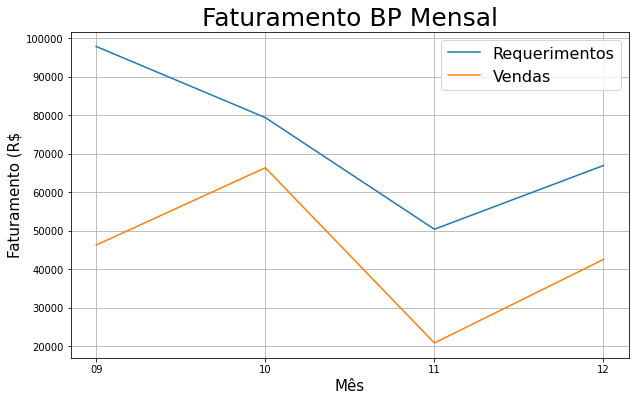

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Faturamento BP Mensal', size=25)
plt.legend(legend, prop={'size': 16})
plt.xlabel('Mês', size=15)
plt.ylabel('Faturamento (R$', size=15)
plt.grid()
plt.show()

* Faturamento Requerimento **mês Outubro R$79.390.00**

* Faturamento Requerimento **mês Novemrbo	R$56.420.00**	

* Faturamento Requerimento **mês Dezembro	R$66.950.00**	

* Faturamento Particular **mês Outubro R$66.373.00**

* Faturamento Particular **mês Novemrbo	R$14.909.00**	

* Faturamento Particular **mês Dezembro	R$42.580.00**	

##  Quantidade de atendimentos em cada mês

In [ ]:
process = df.groupby('Mês').count()
process['Processo']

Mês
09    42
10    41
11    21
12    30
Name: Processo, dtype: int64

* Foram **41 atendimentos** no mês de Outubro.
* Foram **21 atendimentos** no mês de Novembro.
* Foram **30 atendimentos** no mês de Dezembro.


# **Question 2: Quantos atendimentos por "Categoria" nos ultimos 3 meses?**

## **Task 7:** Filtrando quantas vezes apareceu a palavra "PLANO".

In [ ]:
df.loc[df['Categoria'] == 'PLANO', ['Processo']].count()

Processo    85
dtype: int64

## **Task 8:** Criando um agrupamento de cada atendimento por categoria.

In [ ]:
categoria = df.groupby('Categoria').count()
categoria['Processo']

Categoria
COMPLEMENTAÇÃO     3
COROA              1
GRATUITO           2
NOVA FUNERÁRIA     4
PARTICULAR        27
PLANO             85
PLANO/COROA       10
SEGURO             2
Name: Processo, dtype: int64

### **Foram:**

* **3 antendimentos** Complementação
* **2 atendimentos** Gratuito
* **2 atendimentos** Nova Funerária
* **19 atendimentos** Particular
* **58 atendimentos** Plano
* **6 atendimentos** Plano C/ Coroa
* **2 atendimentos** Seguro

## **Task 9:** Definindo os valores de x e y para usar no gráfico.

In [ ]:
x = categoria.index
y = categoria.index = categoria.Processo
y

Categoria
COMPLEMENTAÇÃO     3
COROA              1
GRATUITO           2
NOVA FUNERÁRIA     4
PARTICULAR        27
PLANO             85
PLANO/COROA       10
SEGURO             2
Name: Processo, dtype: int64

In [ ]:
yticks = [x for x in range(0, 100, 4)]

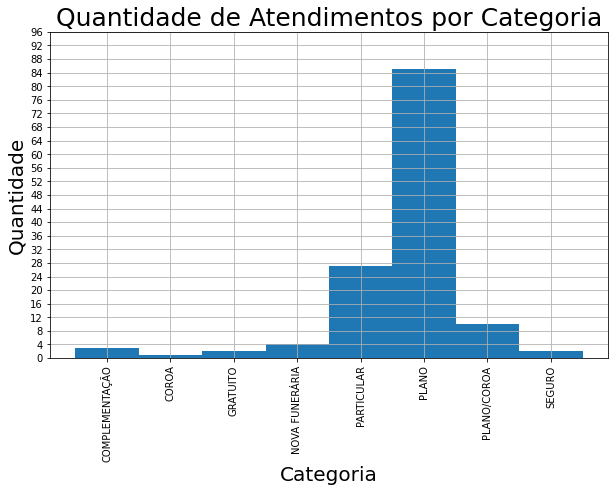

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x, y, width=1)
plt.title('Quantidade de Atendimentos por Categoria', size=25)
plt.xlabel('Categoria', size=20)
plt.ylabel('Quantidade', size=20)
plt.xticks(rotation=90)
plt.yticks(yticks)
plt.grid()
plt.show()

# **Question 3: Qual foi o produto mais vendido?**

In [ ]:
df.head()

,Data,Processo,Categoria,Vendas,Requerimento,Total Vendas,Mês,Dia
0,2022-09-01,352,PLANO/COROA,nan,3110.0,0.0,09,01
1,2022-09-02,353,PLANO,"TANATO, 2 COROAS",2900.0,1460.0,09,02
2,2022-09-03,354,PARTICULAR,"E, COROA",0.0,3270.0,09,03
3,2022-09-03,355,PLANO,COROA,3110.0,280.0,09,03
4,2022-09-03,356,PLANO,nan,2900.0,0.0,09,03


## **Task 10:** Filtrando os atendimentos onde o valor de vendas é diferente de "nan"

In [ ]:
produtos = df.loc[df['Vendas'] != 'nan', ['Vendas']]
produtos.head()


,Vendas
1,"TANATO, 2 COROAS"
2,"E, COROA"
3,COROA
5,"C, COROA"
6,COROA


In [ ]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1 to 131
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Vendas  89 non-null     object
dtypes: object(1)
memory usage: 1.4+ KB


## **Task 11:** Separando cada valor de vendas individualmente

In [ ]:
a = produtos['Vendas'].str.split(',').str[0]
b = produtos['Vendas'].str.split(',').str[1]
c = produtos['Vendas'].str.split(',').str[2]
d = produtos['Vendas'].str.split(',').str[3]

## **Task 12:** Removendo as vírgulas

In [ ]:
a = a.apply(lambda x: x.replace(',', ''))
b = b.apply(lambda x: str(x).replace(',', ''))
c = c.apply(lambda x: str(x).replace(',', ''))
d = d.apply(lambda x: str(x).replace(',', ''))

## **Task 13:** Removendo os espaços para que o pandas não interprete como valores diferentes.

In [ ]:
a = a.apply(lambda x: x.replace(' ', ''))
b = b.apply(lambda x: str(x).replace(' ', ''))
c = c.apply(lambda x: str(x).replace(' ', ''))
d = d.apply(lambda x: str(x).replace(' ', ''))

## **Task 14:** Excluindo valores núlos.

In [ ]:
b = b.dropna()
c = c.dropna()
d = d.dropna()

In [ ]:
total = pd.concat([a.iloc[0::], b.iloc[0::], c.iloc[0::], d.iloc[0::]], axis=0)
total = total.loc[total != 'nan']

In [ ]:
total = total.value_counts()

In [ ]:
total.head()

COROA     51
TANATO    37
C         13
KM        10
D          8
Name: Vendas, dtype: int64

In [ ]:
total.to_excel('vendas_individuais.xlsx')

## **Task 15:** Definindo os valores X e Y para plotar o g´rafico

In [ ]:
x = total.index
y = total

In [ ]:
yticks = [x for x in range(0, 70, 2)]

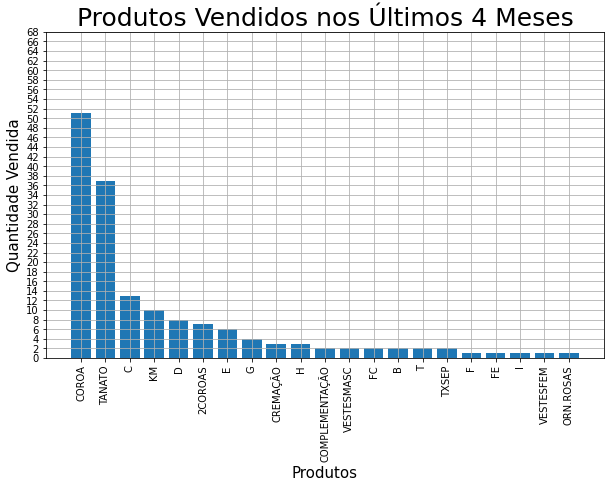

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title('Produtos Vendidos nos Últimos 4 Meses', size=25)
plt.ylabel('Quantidade Vendida', size=15)
plt.xlabel('Produtos', size=15)
plt.yticks(yticks)
plt.xticks(rotation=90)
plt.grid()
plt.show()

## Conclusão:


In [ ]:
produtos_periodo = pd.DataFrame(total)
produtos_periodo.T

,COROA,TANATO,C,KM,D,2COROAS,E,G,CREMAÇÃO,H,...,VESTESMASC,FC,B,T,TXSEP,F,FE,I,VESTESFEM,ORN.ROSAS
Vendas,51,37,13,10,8,7,6,4,3,3,...,2,2,2,2,2,1,1,1,1,1


In [ ]:
coroas_plano = df.loc[df['Categoria'] == 'PLANO/COROA'].count()
coroas_plano['Processo']

10

* Foram utilizadas 11 coroas a parte nos atendimentos do plano

# **Question 4: Qual foi a Média de cada produto?**

## **Task 16:** Filtrar as colunas Vendas e Total Vendas

In [ ]:
media_produtos = df.loc[df['Vendas'] != 'nan', ['Vendas', 'Total Vendas']]
media_produtos.head()

,Vendas,Total Vendas
1,"TANATO, 2 COROAS",1460.0
2,"E, COROA",3270.0
3,COROA,280.0
5,"C, COROA",2580.0
6,COROA,280.0


## **Task 17:** Calculando a média 

In [ ]:
a = media_produtos.groupby(media_produtos['Vendas']).sum()

In [ ]:
a['Quantidade'] = media_produtos.groupby(media_produtos['Vendas']).count()

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 2 COROAS to VESTES MASC, COROA
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Vendas  44 non-null     float64
 1   Quantidade    44 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.0+ KB


In [ ]:
a['Média de Valor'] = a['Total Vendas'] / a['Quantidade']
a

,Total Vendas,Quantidade,Média de Valor
Vendas,,,
2 COROAS,560.0,1,560.0
B,1500.0,1,1500.0
"B, TANATO, TX SEP, 2 COROAS",4033.0,1,4033.0
C,11350.0,5,2270.0
"C, COROA",5160.0,2,2580.0
"C, CREMAÇÃO, TANATO, COROA",6910.0,1,6910.0
"C, KM",2300.0,1,2300.0
"C, TANATO",6080.0,2,3040.0
"C, TANATO, COROA",7290.0,2,3645.0


In [ ]:
x = a.index
y = a['Média de Valor']

In [ ]:
yticks = [x for x in range(0, 9000, 500)]

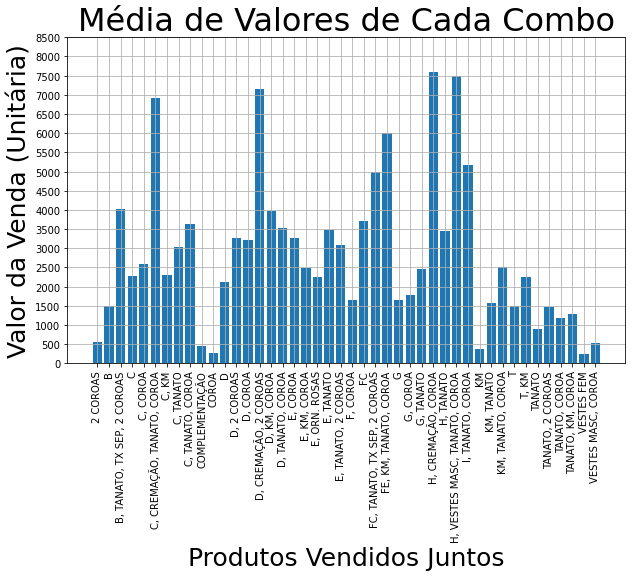

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title('Média de Valores de Cada Combo', size=32)
plt.xlabel('Produtos Vendidos Juntos', size=25)
plt.ylabel('Valor da Venda (Unitária)', size=25)
plt.xticks(rotation=90)
plt.yticks(yticks)
plt.grid()
plt.show()

In [ ]:
a = a.to_excel('relatório bp.xlsx')